In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./Data/H1B_2017.csv', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622773 entries, 0 to 622772
Data columns (total 13 columns):
Unnamed: 0              622773 non-null int64
employer                622773 non-null object
job_title               622773 non-null object
occupational_name       622773 non-null object
prevailing_wage         622773 non-null float64
pw_wage_period          622773 non-null object
employer_wage           622773 non-null float64
employer_max_wage       622773 non-null float64
employer_wage_period    622773 non-null object
city                    622773 non-null object
county                  622773 non-null object
state                   622773 non-null object
postal_code             622773 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 61.8+ MB


In [4]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,employer,job_title,occupational_name,prevailing_wage,pw_wage_period,employer_wage,employer_max_wage,employer_wage_period,city,county,state,postal_code
0,DISCOVER PRODUCTS INC.,ASSOCIATE DATA INTEGRATION,COMPUTER SYSTEMS ANALYSTS,59197.0,Year,65811.0,67320.0,Year,RIVERWOODS,LAKE,IL,60015
1,DFS SERVICES LLC,SENIOR ASSOCIATE,OPERATIONS RESEARCH ANALYSTS,49800.0,Year,53000.0,57200.0,Year,RIVERWOODS,LAKE,IL,60015
2,INFO SERVICES LLC,PROJECT MANAGER,"COMPUTER OCCUPATIONS, ALL OTHER",90376.0,Year,102000.0,0.0,Year,JERSEY CITY,HUDSON,NJ,07302
3,BB&T CORPORATION,ASSOCIATE - ESOTERIC ASSET BACKED SECURITIES,CREDIT ANALYSTS,116605.0,Year,132500.0,0.0,Year,NEW YORK,NEW YORK,NY,10036
4,"SUNTRUST BANKS, INC.",CREDIT RISK METRICS SPECIALIST,"FINANCIAL SPECIALISTS, ALL OTHER",59405.0,Year,71750.0,0.0,Year,ATLANTA,FULTON,GA,30303


In [5]:
data.describe()

,prevailing_wage,employer_wage,employer_max_wage
count,6.227730e+05,6.227730e+05,6.227730e+05
mean,9.971660e+04,1.047551e+05,2.412360e+04
std,1.811748e+06,1.809885e+06,5.253267e+04
min,1.508000e+04,1.500000e+04,0.000000e+00
25%,5.953000e+04,6.500000e+04,0.000000e+00
50%,7.178100e+04,7.785000e+04,0.000000e+00
75%,9.035500e+04,1.000000e+05,0.000000e+00
max,4.013610e+08,3.120000e+08,3.000000e+06


We are going to study the mean prevailing and employer wages for each state.

In [6]:
# Extracting columns of interest
state_jobs= data[['state', 'prevailing_wage', 'employer_wage']]
state_jobs.columns = ['state', 'pr_wage', 'em_wage']
#Create a data frame counting the number of applications per state
state_jobs_count = state_jobs.groupby('state').count()
state_jobs_count.drop(['em_wage'], axis=1, inplace=True)
state_jobs_count.columns = ['total_jobs']
#Create a data frame with mean wages per state
state_jobs_mean = state_jobs.groupby('state').mean()
state_jobs_mean.columns = ['mean_pr_wage', 'mean_em_wage']
#Merge everything in a summary data frame
summary_jobs = state_jobs_count.merge(state_jobs_mean, left_index=True, right_index=True)
summary_jobs.head()

,total_jobs,mean_pr_wage,mean_em_wage
state,,,
AK,200,71721.777800,95276.075700
AL,1734,68213.045386,82710.446840
AR,2780,63922.594460,82016.074788
AZ,9437,82428.939610,80973.450398
CA,119281,123742.106307,122207.738100


In [7]:
summary_jobs.index

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'FM', 'GA',
       'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'PW', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='state')

In [8]:
summary_jobs.describe()

,total_jobs,mean_pr_wage,mean_em_wage
count,57.000000,57.000000,57.000000
mean,10925.842105,82685.730461,96427.404193
std,19968.567781,24468.869479,23701.613127
min,1.000000,47301.571942,57578.061526
25%,652.000000,68213.045386,81469.331177
50%,2904.000000,73728.037117,95276.075700
75%,10657.000000,94957.656263,104794.924872
max,119281.000000,172723.112791,186313.280274


** Is there any correlation between the employer proposed wage and prevailing wage? **

Let's consider salaries equal to or below $300K.

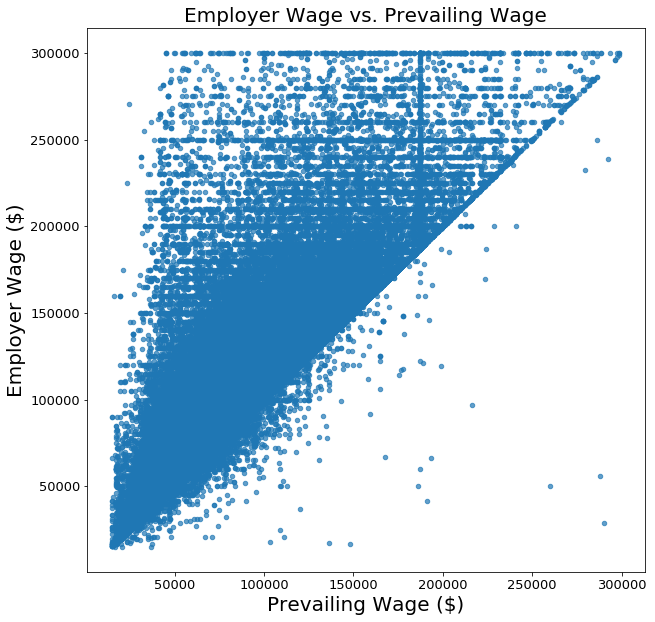

Pearson correlation: 0.8633


In [17]:
plt.figure(figsize=(10,10))
filter1 = (data.prevailing_wage<=300000) & (data.employer_wage<=300000)
plt.scatter(data.prevailing_wage[filter1], data.employer_wage[filter1], alpha=0.7, s=20)
plt.xlabel('Prevailing Wage ($)', size=20)
plt.xticks(size=13)
plt.ylabel('Employer Wage ($)', size=20)
plt.yticks(size=13)
plt.title('Employer Wage vs. Prevailing Wage', size=20)
plt.show()

pearson = np.corrcoef(data.prevailing_wage[filter1], data.employer_wage[filter1])[0,1]
print("Pearson correlation: %.4f" %pearson)

** Is there any correlation between the number jobs and the mean employer proposed wage? **

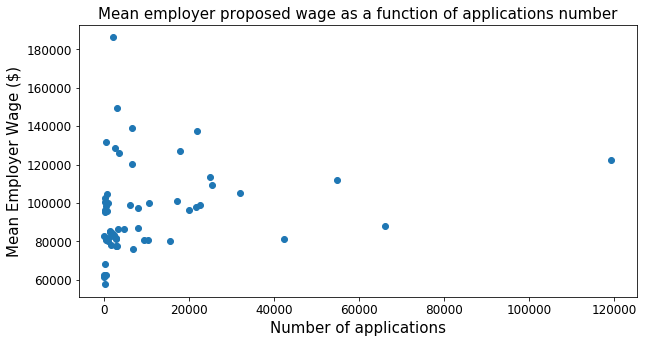

Pearson correlation: 0.1957


In [9]:
plt.figure(figsize=(10,5))
plt.scatter(summary_jobs.total_jobs, summary_jobs.mean_em_wage)
plt.xticks(size=12)
plt.xlabel("Number of applications", size=15)
plt.yticks(size=12)
plt.ylabel("Mean Employer Wage ($)", size=15)
plt.title("Mean employer proposed wage as a function of applications number", size=15)
plt.show()

pearson = np.corrcoef(summary_jobs.total_jobs, summary_jobs.mean_em_wage)[0,1]
print("Pearson correlation: %.4f" %pearson)

**Is there any correlation between the number jobs and the mean prevailing wage?**

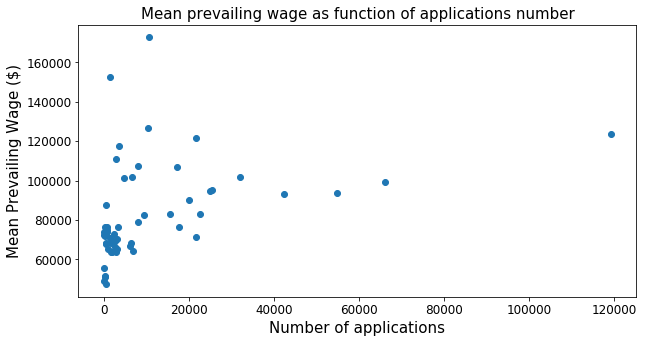

Pearson correlation: 0.3876


In [10]:
plt.figure(figsize=(10,5))
plt.scatter(summary_jobs.total_jobs, summary_jobs.mean_pr_wage)
plt.xticks(size=12)
plt.xlabel("Number of applications", size=15)
plt.yticks(size=12)
plt.ylabel("Mean Prevailing Wage ($)", size=15)
plt.title("Mean prevailing wage as function of applications number", size=15)
plt.show()

pearson = np.corrcoef(summary_jobs.total_jobs, summary_jobs.mean_pr_wage)[0,1]
print("Pearson correlation: %.4f" %pearson)

**Is there any correlation between the mean prevailing and employer wages?**

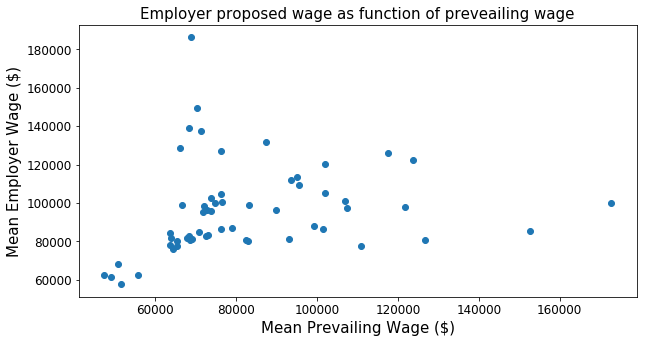

Pearson correlation: 0.1888


In [11]:
plt.figure(figsize=(10,5))
plt.scatter(state_jobs_mean.mean_pr_wage, state_jobs_mean.mean_em_wage)
plt.xticks(size=12)
plt.xlabel("Mean Prevailing Wage ($)", size=15)
plt.yticks(size=12)
plt.ylabel("Mean Employer Wage ($)", size=15)
plt.title("Employer proposed wage as function of preveailing wage", size=15)
plt.show()

pearson = np.corrcoef(state_jobs_mean.mean_pr_wage, state_jobs_mean.mean_em_wage)[0,1]
print("Pearson correlation: %.4f" %pearson)

** Overall comparison by ordering the data**

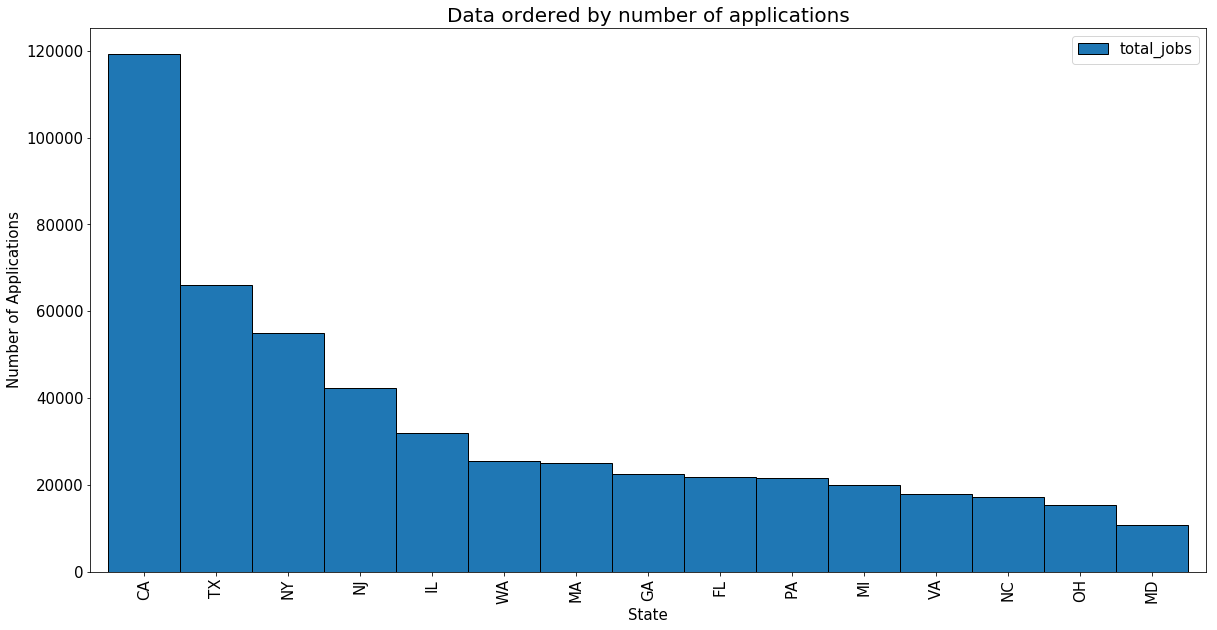

In [12]:
summary_jobs.total_jobs.sort_values(ascending = False).head(15).plot.bar(width=1, \
                                                                figsize=(20,10), color='C0', edgecolor='k')
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.ylabel("Number of Applications", size=15)
plt.title("Data ordered by number of applications", size=20)
plt.legend(fontsize=15)
plt.show()

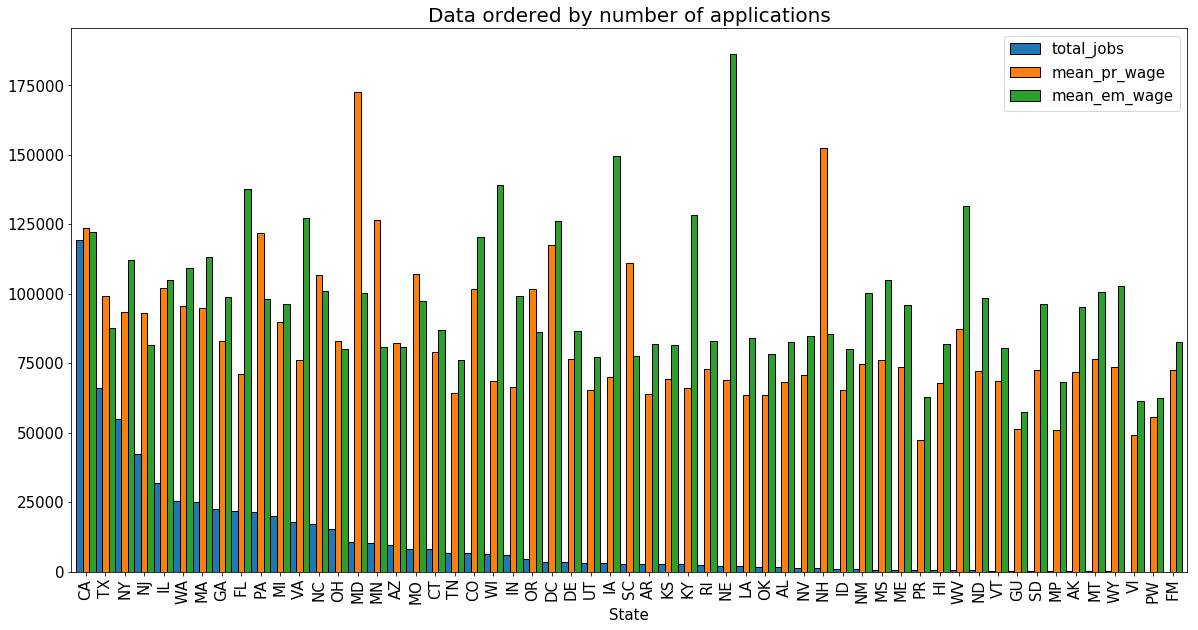

In [13]:
summary_jobs.sort_values(by='total_jobs', ascending = False).plot.bar(width=1, figsize=(20,10), edgecolor='k')
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.title("Data ordered by number of applications", size=20)
plt.legend(fontsize=15)
plt.show()

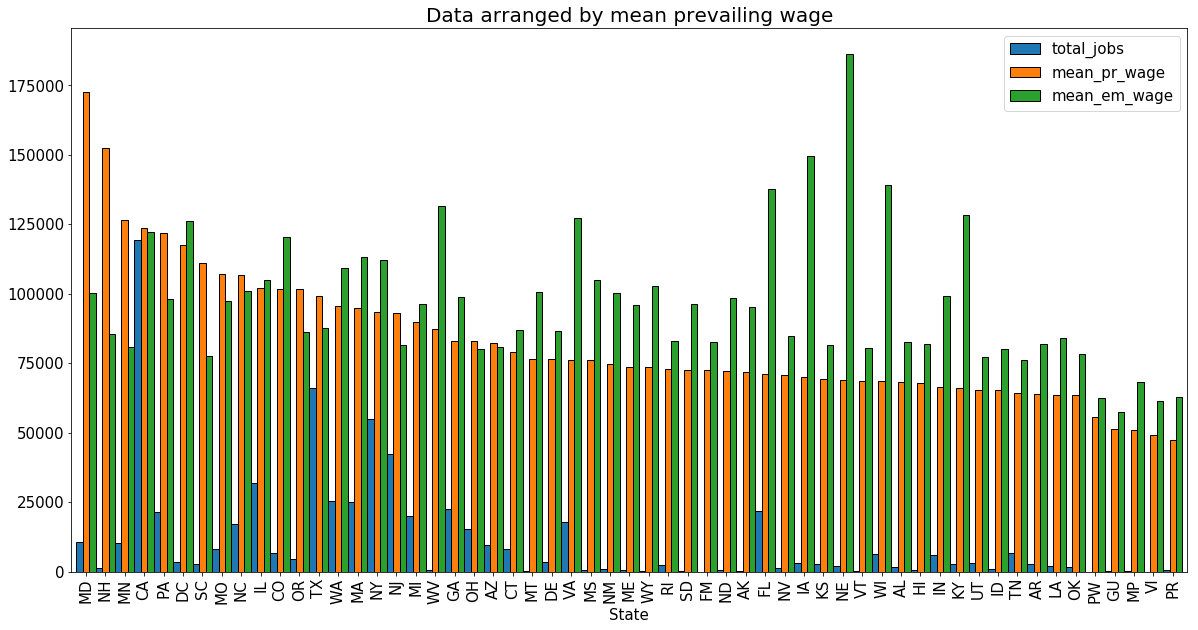

In [14]:
summary_jobs.sort_values(by='mean_pr_wage', ascending = False).plot.bar(width=1, figsize=(20,10), edgecolor='k')
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.title("Data arranged by mean prevailing wage", size=20)
plt.legend(fontsize=15)
plt.show()

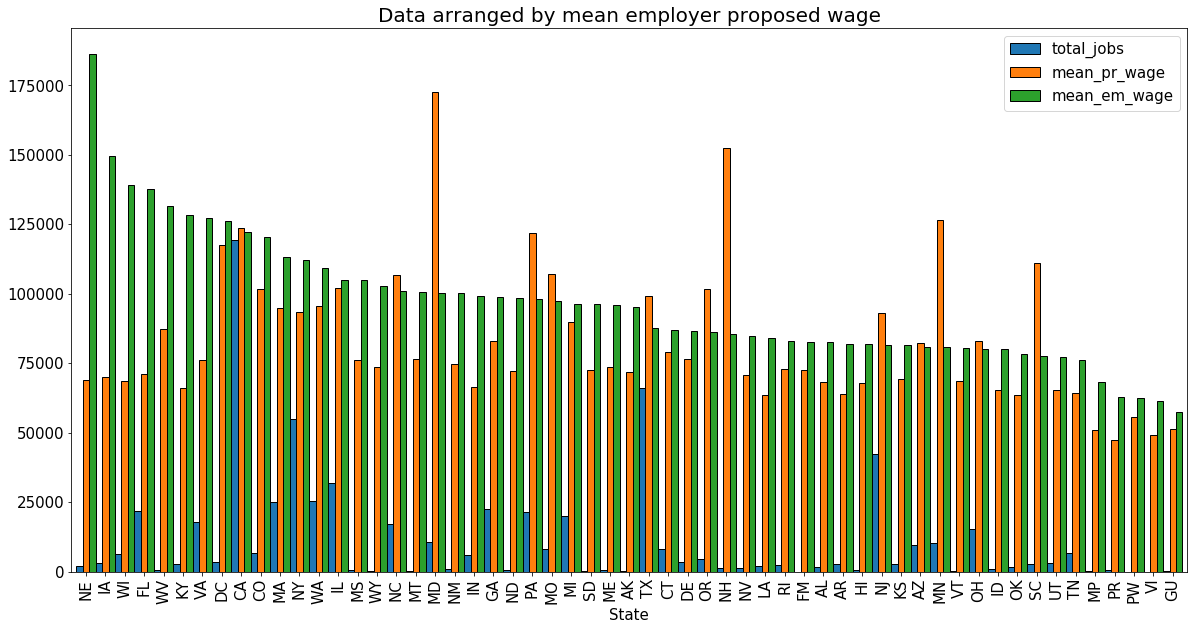

In [15]:
summary_jobs.sort_values(by='mean_em_wage', ascending = False).plot.bar(width=1, figsize=(20,10), edgecolor='k')
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.title("Data arranged by mean employer proposed wage", size=20)
plt.legend(fontsize=15)
plt.show()

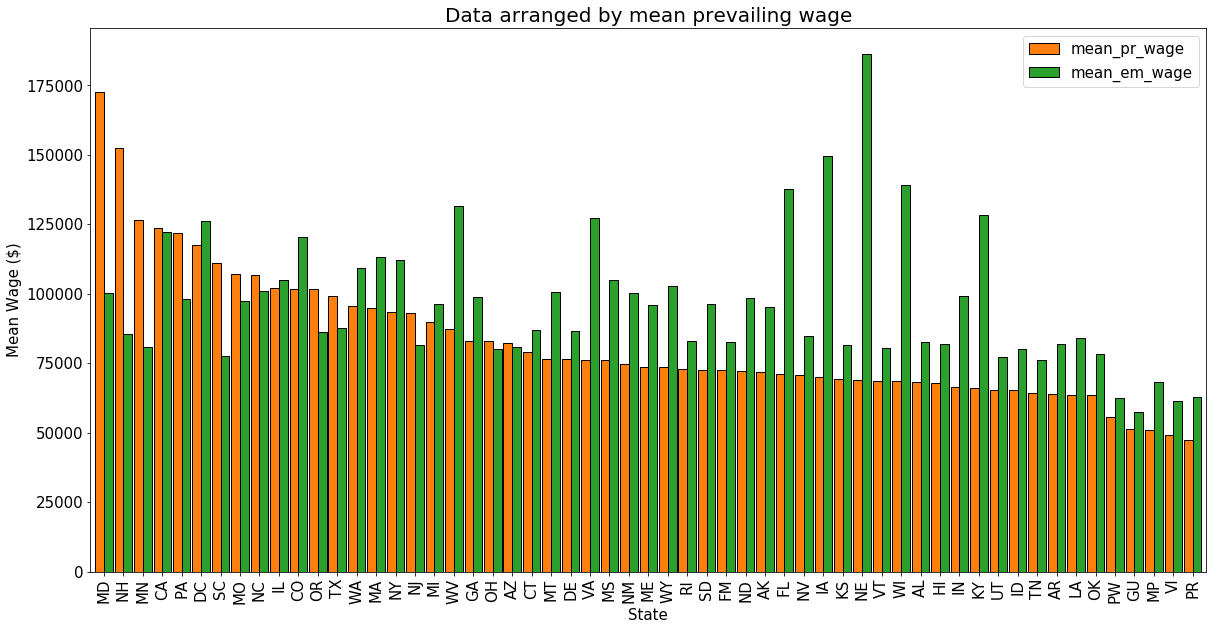

In [16]:
state_jobs_mean = state_jobs_mean.sort_values(by='mean_pr_wage', ascending = False)
state_jobs_mean.plot.bar(width=0.9, figsize=(20,10), edgecolor='k', color=['C1', 'C2'])
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.ylabel("Mean Wage ($)", size=15)
plt.title("Data arranged by mean prevailing wage", size=20)
plt.legend(fontsize=15)
plt.show()

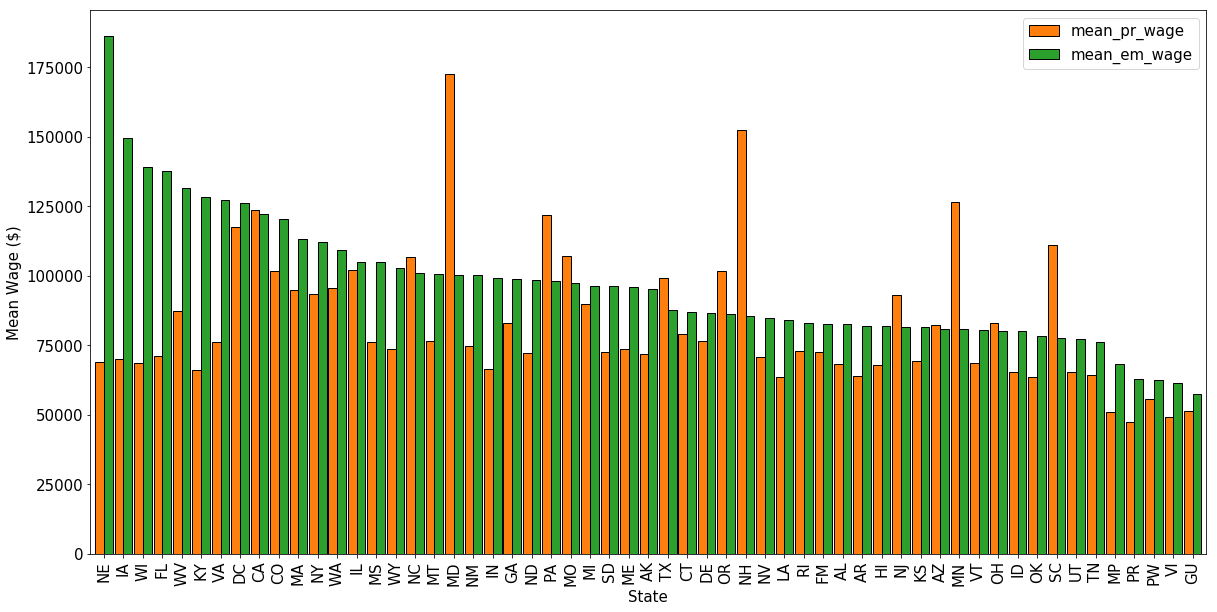

In [17]:
state_jobs_mean = state_jobs_mean.sort_values(by='mean_em_wage', ascending = False)
state_jobs_mean.plot.bar(width=0.9, figsize=(20,10), edgecolor='k', color=['C1', 'C2'])
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.ylabel("Mean Wage ($)", size=15)
plt.legend(fontsize=15)
plt.show()

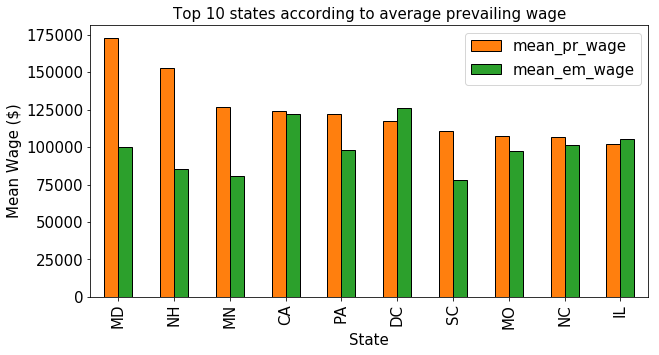

In [18]:
state_jobs_mean = state_jobs_mean.sort_values(by='mean_pr_wage', ascending = False)
state_jobs_mean.head(10).plot.bar(edgecolor='k', figsize=(10,5), color=['C1', 'C2'])
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.ylabel("Mean Wage ($)", size=15)
plt.title("Top 10 states according to average prevailing wage", size=15)
plt.legend(fontsize=15)
plt.show()

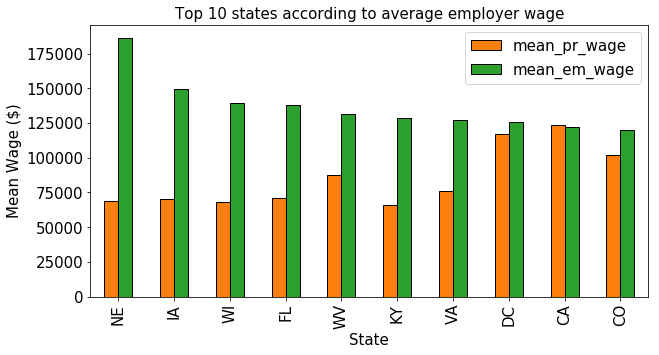

In [19]:
state_jobs_mean = state_jobs_mean.sort_values(by='mean_em_wage', ascending = False)
state_jobs_mean.head(10).plot.bar(edgecolor='k', figsize=(10,5), color=['C1', 'C2'])
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.ylabel("Mean Wage ($)", size=15)
plt.title("Top 10 states according to average employer wage", size=15)
plt.legend(fontsize=15)
plt.show()

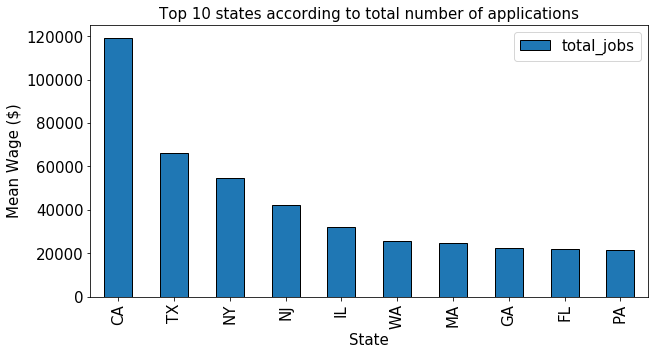

In [20]:
state_jobs_count = state_jobs_count.sort_values(by='total_jobs', ascending = False)
state_jobs_count.head(10).plot.bar(edgecolor='k', figsize=(10,5), color=['C0'])
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.ylabel("Mean Wage ($)", size=15)
plt.title("Top 10 states according to total number of applications", size=15)
plt.legend(fontsize=15)
plt.show()

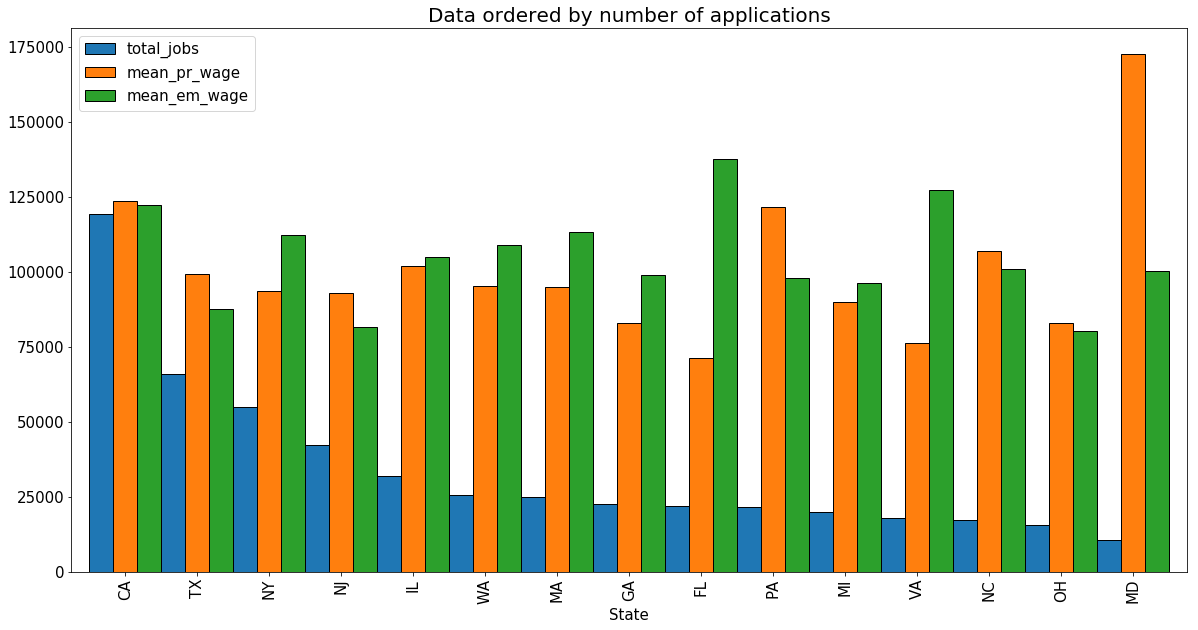

In [21]:
summary_jobs.sort_values(by='total_jobs', ascending = False).head(15).plot.bar(width=1, figsize=(20,10), edgecolor='k')
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.title("Data ordered by number of applications", size=20)
plt.legend(fontsize=15)
plt.show()

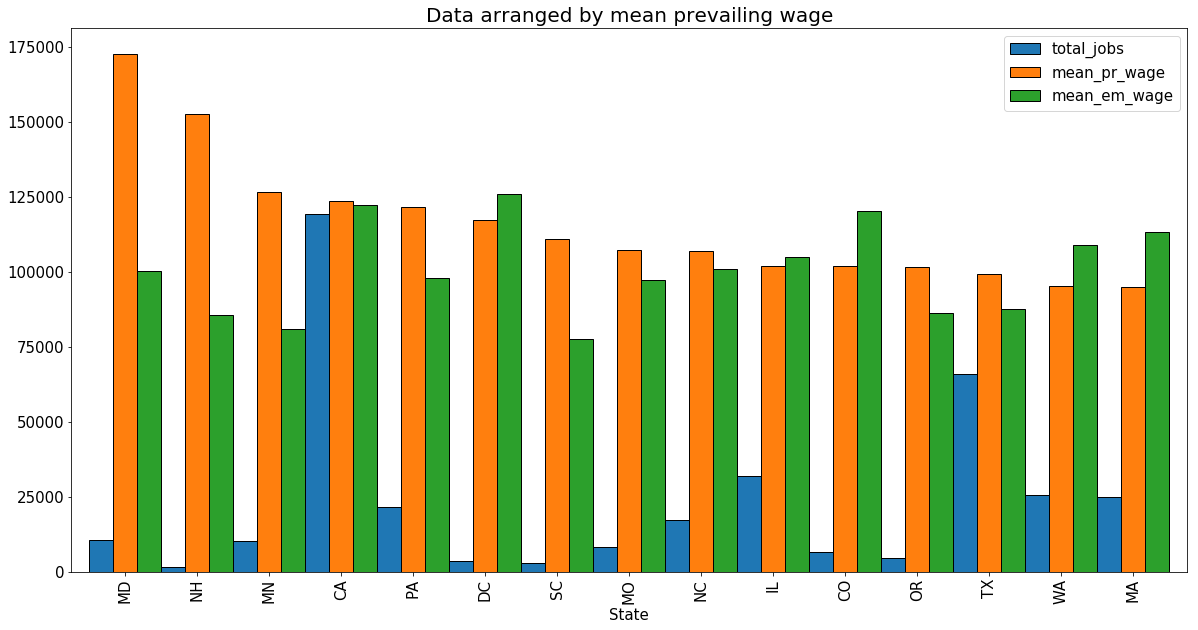

In [22]:
summary_jobs.sort_values(by='mean_pr_wage', ascending = False).head(15).plot.bar(width=1, figsize=(20,10), edgecolor='k')
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.title("Data arranged by mean prevailing wage", size=20)
plt.legend(fontsize=15)
plt.show()

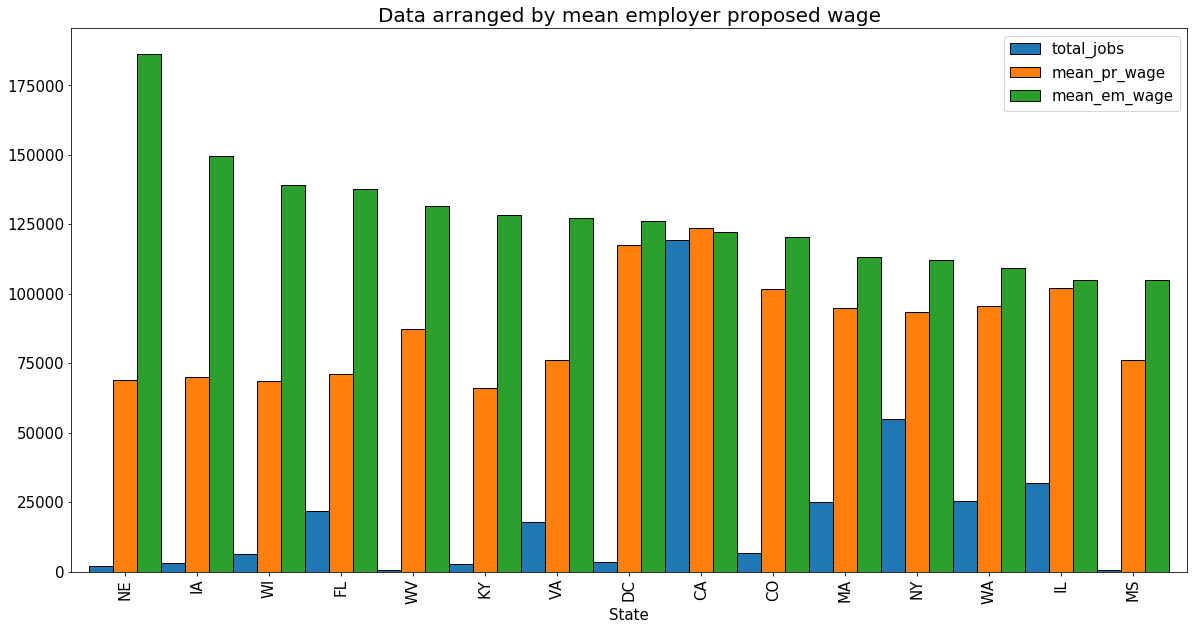

In [23]:
summary_jobs.sort_values(by='mean_em_wage', ascending = False).head(15).plot.bar(width=1, figsize=(20,10), edgecolor='k')
plt.xticks(size=15)
plt.xlabel("State", size=15)
plt.yticks(size=15)
plt.title("Data arranged by mean employer proposed wage", size=20)
plt.legend(fontsize=15)
plt.show()

# Story:

# Attractive states are not the best paying ones for international talent

Every year thousands of H1B visa applications are filled. This type of visa is used in principle to bring specialized workers to the United Stated who are in high demand and scarse in the US job market. The graph below shows the top fifteen states in number of filled applications.

![](./Figures/num_applications.png)

As we see, in the top states we have not only the most productive US states but also the ones that are the most attractive at an international level. But what does the ranking concerning the prevailing wages and proposed wages tells us?

![](./Figures/num_applications_2.png)

![](./Figures/pr_wage_order.png)

If we consider first the prevailing wage, we see that there is no longer a correlation with the number of applications and even more, states with a low applications number start to show a high prevailing wage. But is this prevailing wage correlated with higher employer proposed wage? It turns out that this correlation is not so high, of the order of 38%. So what drives higher employer proposed wage?

![](./Figures/mean_wage_order.png)

As the graph above shows, a high mean salary doesn't seem to be related to the mean prevailing wage but in accordance with a low number of aplications as confirmed by the scatter plot below:

![](./Figures/scatter_employer_wage_mean_applications.png)

This may infer that unattractive locations in need of specialized workers tend to attract international talent by means of high salaries while attractive locations rely heavily on their international mediatic exposure and high populations without making an extravagant effort on salary.

It important to note that the observations just described above take into account state averages. Making intra-state analysises or or by economic sector may give us a drastically different picture. However the purpose of this work was to illustrate inter-state trends.